# Dask
Пакет для параллельных вычислений. СТруктура массивов аналогична Numpy, датафрейсы аналогичны Pandas. Dask ML - аналог sklearn. Работает при нехватке оперативной памяти.

In [1]:
# !pip install s3fs > None

In [2]:
import dask.dataframe as dd

NYC taxi cab data 2015

Apache Parquet - бинарный колоночно-оринетированный формат хранения больших данных

## Dask DataFrame

In [3]:
ddf =dd.read_parquet('s3://dask-data/nyc-taxi/nyc-2015.parquet/part.*.parquet',
                     columns=['passenger_count', 'tip_amount'],
                     storage_options={'anon': True})

In [4]:
ddf.head()

,passenger_count,tip_amount
0,5,0.0
1,3,0.0
2,1,0.0
3,1,0.0
4,2,0.0


In [5]:
type(ddf)

dask.dataframe.core.DataFrame

## Ленивые вычисления и граф вычислений

In [7]:
result = ddf.groupby('passenger_count').tip_amount.mean()
result

Dask Series Structure:
npartitions=1
    float64
        ...
Name: tip_amount, dtype: float64
Dask Name: truediv, 167 tasks

In [8]:
result.visualize()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.934784 to fit


In [9]:
result.compute()

passenger_count
0    1.590343
1    1.752130
2    1.705595
3    1.579748
4    1.459269
5    1.728534
6    1.680769
7    3.863473
8    5.060718
9    5.075917
Name: tip_amount, dtype: float64

## Merging pandas DataFrames

In [13]:
import pandas as pd

In [14]:
pd_df_1 = pd.DataFrame(
    {
        'Name': ['Azza', 'Brandon', 'Cedric', 'Devonte', 'Eli', 'Fabio'],
        'Age': [29, 30, 21, 57, 32, 19]
    }
)

ddf1 = dd.from_pandas(pd_df_1, npartitions=2)

pd_df_2 = pd.DataFrame(
    {
        'Name': ['Azza', 'Cedric', 'Fabio'],
        'City': ['Beirut', 'Dublin', 'Rosario']
    }
)

joined = ddf1.merge(pd_df_2, how='left', on='Name')
joined

,Name,Age,City
npartitions=2,,,
,object,int64,object
,...,...,...
,...,...,...


In [15]:
joined.compute()

,Name,Age,City
0,Azza,29,Beirut
1,Brandon,30,NaN
2,Cedric,21,Dublin
0,Devonte,57,NaN
1,Eli,32,NaN
2,Fabio,19,Rosario


## Dask-ML

In [16]:
from dask_ml.datasets import make_blobs
from dask_ml.cluster import KMeans
import matplotlib.pyplot as plt

In [18]:
X, y = make_blobs(n_samples=1000000, chunks=100000, random_state=42, centers=3)
X = X.persist()
X

dask.array<concatenate, shape=(1000000, 2), dtype=float64, chunksize=(100000, 2), chunktype=numpy.ndarray>

Параллельная версия K-means

In [19]:
km = KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

KMeans(init_max_iter=2, n_clusters=3, oversampling_factor=10)

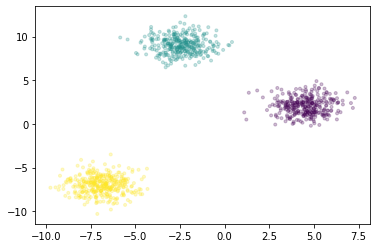

In [22]:
fig, ax = plt.subplots()
ax.scatter(X[::1000, 0], X[::1000, 1], marker='.', c=km.labels_[::1000], cmap='viridis', alpha=0.25)